In [1]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import data
train = pd.read_csv('AIMS_Train.csv')
test=  pd.read_csv('AIMS_Test.csv')
submission = pd.read_csv('AIMS_SampleSubmission.csv')

In [4]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,51d5367a58953904c14238c4dd7393f5c4fd0a88,MATAM,K > 24 month,1000.0,1.0,990.0,330.0,1.0,97.0,1.0,NaN,NaN,NaN,NaN,NO,22,"Data:1000F=2GB,30d",1.0,0
1,3322a4900689f7f3cb14b8f9ea00778853f02d75,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,0
2,3b00ec4bfcc855c6f39b14a722e47ec6d15607e7,DAKAR,K > 24 month,700.0,5.0,1010.0,337.0,7.0,566.0,1.0,3.0,15.0,0.0,NaN,NO,8,"Data: 100 F=40MB,24H",3.0,0
3,98c44b62c33c6a1d9dbcf5e918868419f249c4a8,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
4,18bd8c41ecb503a2d9137e3f70bc1caf146a266d,NaN,K > 24 month,3000.0,3.0,2995.0,998.0,3.0,NaN,NaN,33.0,NaN,NaN,NaN,NO,9,NaN,NaN,0


In [5]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
646209,1c778c81cdcc43cb410db142935d1483367c24aa,KAOLACK,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
646210,e13ff861de0ffd7a51084963634ccd027597511c,SAINT-LOUIS,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,28.0,53.0,NaN,NaN,NaN,NO,32,MIXT:500F= 2500F on net _2500F off net;2d,2.0,0
646211,03ec81dadb13af0876d579a24a033ab27e7e2913,THIES,K > 24 month,13000.0,26.0,14000.0,4667.0,26.0,NaN,2973.0,183.0,50.0,NaN,NaN,NO,58,On-net 500F_FNF;3d,15.0,0
646212,c265e207e32f0573881ddcfa312022ee33372d4b,NaN,K > 24 month,3100.0,4.0,3033.0,1011.0,4.0,12905.0,NaN,0.0,NaN,NaN,NaN,NO,24,"Data:1000F=5GB,7d",3.0,0
646213,3fab267c587943cd2afedf8066b6a4b698220421,KOLDA,K > 24 month,6500.0,12.0,6500.0,2167.0,11.0,NaN,49.0,220.0,NaN,NaN,NaN,NO,57,All-net 500F =2000F_AllNet_Unlimited,13.0,0


In [6]:
train.shape

(646214, 19)

In [7]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646214 entries, 0 to 646213
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         646214 non-null  object 
 1   REGION          391246 non-null  object 
 2   TENURE          646214 non-null  object 
 3   MONTANT         419154 non-null  float64
 4   FREQUENCE_RECH  419154 non-null  float64
 5   REVENUE         428459 non-null  float64
 6   ARPU_SEGMENT    428459 non-null  float64
 7   FREQUENCE       428459 non-null  float64
 8   DATA_VOLUME     327544 non-null  float64
 9   ON_NET          409962 non-null  float64
 10  ORANGE          377516 non-null  float64
 11  TIGO            259060 non-null  float64
 12  ZONE1           50406 non-null   float64
 13  ZONE2           41072 non-null   float64
 14  MRG             646214 non-null  object 
 15  REGULARITY      646214 non-null  int64  
 16  TOP_PACK        375331 non-null  object 
 17  FREQ_TOP_P

In [8]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,c1b31e7cef249f2b777d934886b787a433029263,DAKAR,K > 24 month,10600.0,18.0,11099.0,3700.0,22.0,4004.0,60.0,123.0,19.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,9.0
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,KAOLACK,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,THIES,K > 24 month,17900.0,36.0,18405.0,6135.0,44.0,0.0,446.0,50.0,28.0,2.0,NaN,NO,62,On-net 1000F=10MilF;10d,9.0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,DAKAR,K > 24 month,10000.0,10.0,10001.0,3334.0,27.0,NaN,0.0,93.0,8.0,NaN,NaN,NO,45,All-net 500F=2000F;5d,12.0
4,96c6a822243654ae1fe5f5f887089681f806cb46,THIES,K > 24 month,500.0,1.0,500.0,167.0,1.0,NaN,8.0,14.0,NaN,NaN,NaN,NO,8,All-net 500F=2000F;5d,1.0


In [8]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [9]:
test.shape

(114038, 18)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [10]:
submission.head()

,user_id,CHURN
0,c1b31e7cef249f2b777d934886b787a433029263,0
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,0
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,0
4,96c6a822243654ae1fe5f5f887089681f806cb46,0


In [12]:
submission.shape

(380127, 2)

In [ ]:
#Check how many levels are involved in each of the categorical features (object)

DAKAR          154267
THIES           53902
SAINT-LOUIS     35882
LOUGA           29629
KAOLACK         29057
DIOURBEL        20083
TAMBACOUNDA     16449
KAFFRINE        13113
KOLDA           11511
FATICK          10676
MATAM            8755
ZIGUINCHOR       6664
SEDHIOU           972
KEDOUGOU          286
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

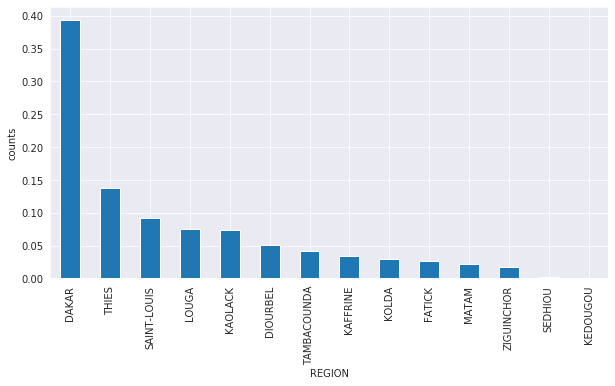

In [11]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

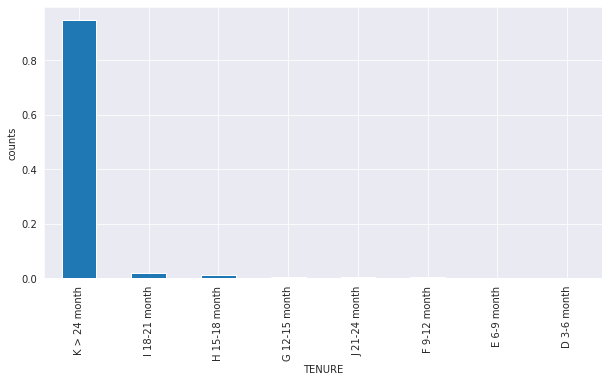

In [15]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

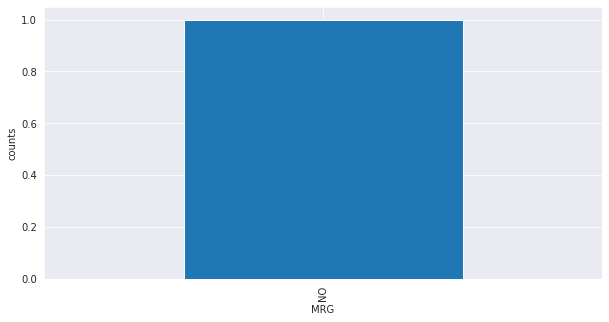

In [16]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d                  95425
On net 200F=Unlimited _call24H         45713
Data:490F=1GB,7d                       34513
Data: 100 F=40MB,24H                   25538
Mixt 250F=Unlimited_call24H            20033
                                       ...  
NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE        1
CVM_On-net 400f=2200F                      1
Data_Mifi_10Go_Monthly                     1
EVC_JOKKO30                                1
APANews_weekly                             1
Name: TOP_PACK, Length: 119, dtype: int64


Text(0.5, 0, 'TOP_PACK')

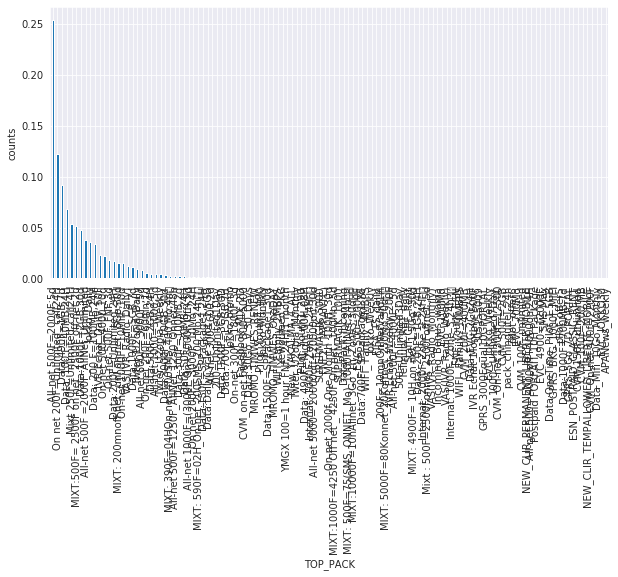

In [12]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

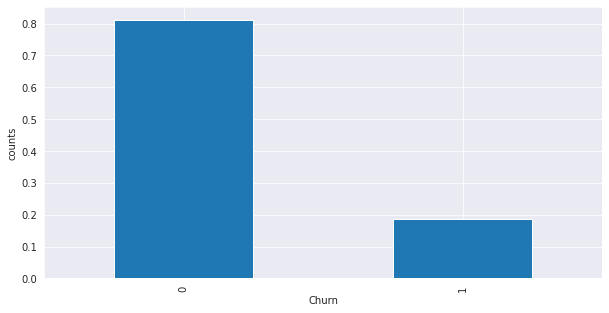

In [18]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [19]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [20]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [21]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [22]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [13]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns

In [14]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,51d5367a58953904c14238c4dd7393f5c4fd0a88,K > 24 month,1000.0,1.0,990.0,330.0,1.0,97.0,1.0,NaN,NaN,NaN,NaN,22,1.0,0
1,3322a4900689f7f3cb14b8f9ea00778853f02d75,K > 24 month,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN,NaN,4,NaN,0
2,3b00ec4bfcc855c6f39b14a722e47ec6d15607e7,K > 24 month,700.0,5.0,1010.0,337.0,7.0,566.0,1.0,3.0,15.0,0.0,NaN,8,3.0,0
3,98c44b62c33c6a1d9dbcf5e918868419f249c4a8,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
4,18bd8c41ecb503a2d9137e3f70bc1caf146a266d,K > 24 month,3000.0,3.0,2995.0,998.0,3.0,NaN,NaN,33.0,NaN,NaN,NaN,9,NaN,0


In [15]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [26]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,42,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,41,1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,57,22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [27]:
#Fill NAs for train data

In [16]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [17]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,51d5367a58953904c14238c4dd7393f5c4fd0a88,K > 24 month,1000.000000,1.000000,990.000000,330.00000,1.000000,97.000000,1.000000,95.274982,23.070601,7.987779,7.547478,22,1.000000,0
1,3322a4900689f7f3cb14b8f9ea00778853f02d75,K > 24 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,223.000000,277.649655,95.274982,23.070601,7.987779,7.547478,4,9.284301,0
2,3b00ec4bfcc855c6f39b14a722e47ec6d15607e7,K > 24 month,700.000000,5.000000,1010.000000,337.00000,7.000000,566.000000,1.000000,3.000000,15.000000,0.000000,7.547478,8,3.000000,0
3,98c44b62c33c6a1d9dbcf5e918868419f249c4a8,K > 24 month,5535.843227,11.529891,5509.610712,1836.54327,13.975855,3372.704974,277.649655,95.274982,23.070601,7.987779,7.547478,3,9.284301,0
4,18bd8c41ecb503a2d9137e3f70bc1caf146a266d,K > 24 month,3000.000000,3.000000,2995.000000,998.00000,3.000000,3372.704974,277.649655,33.000000,23.070601,7.987779,7.547478,9,9.284301,0


In [18]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [31]:
#Fill NAs for test data

In [19]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [33]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,5.000000,8.164663,7.6553,42,5.000000
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,23.052088,8.164663,7.6553,41,1.000000
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,5.000000,8.164663,7.6553,57,22.000000
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,8.164663,7.6553,9,9.261584
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,8.164663,7.6553,10,9.261584


In [34]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [21]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(646214, 14)
(646214,)
(114038, 14)


In [37]:
#Split training data into train and test split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(323107, 14)
(323107,)
(323107, 14)
(323107,)


In [39]:
#Further split X_train and y_train into train and validation sets

In [23]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

In [24]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(226174, 14)
(226174,)
+++++++
test
(323107, 14)
(323107,)
+++++++
validation
(96933, 14)
(96933,)


In [42]:
#Standardize numeric columns

In [25]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [26]:
scaler = StandardScaler()

In [27]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [28]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
383784,H 15-18 month,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-0.945425,-0.000370
63445,K > 24 month,-0.709067,-0.797679,-0.723054,-0.722887,-0.917718,-0.387884,-0.362957,-0.552189,0.075961,-0.001386,0.002724,0.714842,-0.765190
572791,K > 24 month,-0.621054,-0.891239,-0.783247,-0.783252,-0.834031,0.003011,-0.351305,-0.405372,-0.431643,-0.001386,0.002724,-0.272344,-0.000370
256585,J 21-24 month,-0.092974,-0.142762,-0.172891,-0.172895,-0.331911,-0.387884,-0.164874,0.130829,-0.330122,-0.001386,0.002724,1.028946,-0.135216
112890,K > 24 month,0.001349,0.000374,0.000741,0.000741,0.000815,-0.387884,-0.000800,-0.001466,0.001612,-0.001386,0.002724,0.894330,-0.000370


In [29]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [30]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
173299,K > 24 month,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-0.227472,-0.000370
561166,K > 24 month,-0.849888,-0.891239,-0.826414,-0.826591,-1.001405,-0.387884,-0.294502,-0.001466,0.001612,-0.001386,0.002724,0.894330,-0.870186
426016,K > 24 month,0.083053,-0.236322,0.085078,0.085075,0.086522,0.176199,-0.378979,-0.418139,-0.558544,-0.001386,0.002724,1.477667,-0.555199
310004,I 18-21 month,0.001349,0.000374,0.000741,0.000741,0.000815,-0.387884,-0.400826,-0.001466,0.001612,-0.001386,0.002724,-0.137728,-0.000370
117643,K > 24 month,0.001349,0.000374,-0.936309,-0.936486,-1.085091,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-1.169785,-0.000370


In [31]:
test[num_cols] = scaler.transform(test[num_cols])

In [32]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,K > 24 month,0.892775,0.605714,0.962003,0.962173,0.672329,0.076178,-0.317806,0.175512,-0.101701,0.030737,0.049737,1.477667,-0.030220
1,K > 24 month,0.003950,-0.000789,0.003583,0.003582,-0.001733,-0.387884,-0.395000,0.000665,0.000471,0.030737,0.049737,-0.990297,0.001534
2,K > 24 month,2.177769,2.289787,2.218487,2.218488,2.513435,-0.387884,0.244402,-0.290472,0.126721,-0.489327,0.049737,1.522539,-0.030220
3,K > 24 month,0.787159,-0.142762,0.773169,0.773339,1.090762,0.004753,-0.405196,-0.015988,-0.380883,0.030737,0.049737,0.759714,0.284767
4,K > 24 month,-0.885093,-0.984798,-0.860810,-0.860643,-1.085091,0.004753,-0.393544,-0.520272,0.000471,0.030737,0.049737,-0.900553,-0.870186


In [33]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [34]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
158645,K > 24 month,-0.753073,-0.704120,-0.729590,-0.729594,-0.666658,-0.384987,-0.403739,-0.143655,0.001612,-0.001386,0.002724,-0.676192,-0.555199
291652,K > 24 month,-0.726669,-0.329881,-0.672492,-0.672325,-0.331911,-0.385682,-0.309067,-0.290472,0.001612,-0.001386,0.002724,0.041761,-0.240211
172801,K > 24 month,-0.748673,-0.797679,-0.725806,-0.725983,-0.248225,0.003011,-0.384805,-0.571339,-0.558544,-0.001386,0.002724,-0.137728,-0.870186
14972,K > 24 month,-0.269000,-0.423441,-0.259225,-0.259057,-0.164538,-0.387884,-0.233329,-0.424522,-0.050940,-0.001386,0.002724,0.490481,-0.450203
121,K > 24 month,-0.673862,-0.517000,-0.736641,-0.736817,-0.666658,-0.387768,0.046318,-0.437289,-0.177841,-0.001386,0.002724,1.073818,-0.345207


In [53]:
#Encode the TENURE column

In [35]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [36]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [37]:
X_val['TENURE'] = encoder.transform(X_val["TENURE"])

In [38]:
test['TENURE'] = encoder.transform(test["TENURE"])

In [39]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
383784,4,0.001349,0.000374,0.000741,0.000741,0.000815,0.003011,-0.000800,-0.001466,0.001612,-0.001386,0.002724,-0.945425,-0.000370
63445,7,-0.709067,-0.797679,-0.723054,-0.722887,-0.917718,-0.387884,-0.362957,-0.552189,0.075961,-0.001386,0.002724,0.714842,-0.765190
572791,7,-0.621054,-0.891239,-0.783247,-0.783252,-0.834031,0.003011,-0.351305,-0.405372,-0.431643,-0.001386,0.002724,-0.272344,-0.000370
256585,6,-0.092974,-0.142762,-0.172891,-0.172895,-0.331911,-0.387884,-0.164874,0.130829,-0.330122,-0.001386,0.002724,1.028946,-0.135216
112890,7,0.001349,0.000374,0.000741,0.000741,0.000815,-0.387884,-0.000800,-0.001466,0.001612,-0.001386,0.002724,0.894330,-0.000370


In [59]:
##RandomForestClassifier Model

In [40]:
rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=200,
                              random_state=1,
                             verbose=True)

In [41]:
#Fit model on data
randmodel = rand.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   24.2s finished


In [42]:
#Predict on the X_test data 
randpred = randmodel.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.2s finished


(323107,)

In [43]:
print("Acuracy")
accuracy_score(y_test, randpred)

Acuracy


0.8649425732033041

In [44]:
print("Recall")
recall_score(y_test, randpred)

Recall


0.5887736625514404

In [45]:
print("F1 Score")
f1_score(y_test, randpred)

F1 Score


0.6211124038411447

In [46]:
confusion_matrix(y_test, randpred)

array([[243701,  18656],
       [ 24982,  35768]])

In [67]:
# Making a submissio

In [68]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [69]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,7,-0.092733,-0.611459,-0.086950,-0.086782,-0.750871,-0.002009,0.144956,-0.540553,-0.456498,0.00054,0.011407,0.625630,-0.457526
1,5,-0.914993,-0.892827,-0.887609,-0.887442,-0.918340,-0.315856,0.002055,-0.610935,0.000454,0.00054,0.011407,0.580766,-0.886992
2,7,-0.390146,1.264326,-0.361031,-0.361206,1.007548,0.402807,-0.399600,-0.598139,-0.456498,0.00054,0.011407,1.298587,1.367700
3,7,-0.000892,0.000033,-0.001355,-0.001355,-0.000783,-0.002009,0.002055,-0.001856,0.000454,0.00054,0.011407,-0.854876,0.000024
4,7,-0.000892,0.000033,-0.001355,-0.001355,-0.000783,-0.002009,0.002055,-0.001856,0.000454,0.00054,0.011407,-0.810012,0.000024


In [70]:
subpred = randmodel.predict(test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.1s finished


In [71]:
subpred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
submission["CHURN"] = subpred

In [73]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [74]:
submission.to_csv('starter_code_submission.csv', index=False)

In [75]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class 
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go


### Good Luck !!!